## Курсовая работа

### Подключение библиотек и скриптов

In [53]:
import numpy as np
import pandas as pd
import pickle

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
matplotlib.rcParams.update({'font.size': 14})

In [56]:
prepared_dataset_path = 'test.csv'
train_dataset_path = 'train.csv'

In [57]:
pdp = pd.read_csv(prepared_dataset_path)
tdp = pd.read_csv(train_dataset_path)

### Описание датасета:
#### Id - идентификационный номер квартиры
#### DistrictId - идентификационный номер района
#### Rooms - количество комнат
#### Square - площадь
#### LifeSquare - жилая площадь
#### KitchenSquare - площадь кухни
#### Floor - этаж
#### HouseFloor - количество этажей в доме
#### HouseYear - год постройки дома
#### Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
#### Social_1, Social_2, Social_3 - социальные показатели местности
#### Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
#### Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
#### Price - цена квартиры

### Ознакомление с датасетом

In [58]:
tdp.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [59]:
tdp.tail(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9990,15233,1,3.0,57.373889,39.688445,5.0,2,5.0,1962,0.036270,B,B,6,1318,1,200.0,1,1,B,163807.542987
9991,11553,3,3.0,101.622794,51.628780,12.0,18,17.0,2000,0.265089,B,B,37,5288,0,1937.0,3,2,B,212883.501504
9992,14333,150,3.0,78.249637,49.385096,10.0,5,16.0,1976,0.300323,B,B,52,10311,6,NaN,1,9,B,342418.758888
9993,48,13,3.0,80.631333,48.899083,10.0,11,14.0,1999,0.090799,B,B,74,19083,2,NaN,5,15,B,350684.628560
9994,4158,23,2.0,64.864198,NaN,1.0,17,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,171323.515653
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


Исходя из таблиц выше, видно, что в датасете есть пустые значения. Посмотрим об этом подробнее.

In [60]:
tdp.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

Таким образом, видно, что в колонках LifeSquare и Healthcare_1 есть пустые значения. Заменим их на значения медианы.

In [61]:
tdp.loc[tdp['LifeSquare'].isnull(),'LifeSquare'] = tdp['LifeSquare'].median()
tdp.loc[tdp['Healthcare_1'].isnull(),'Healthcare_1'] = tdp['Healthcare_1'].median()

После данной операции, снова проверим наш датасет на наличие пустых значений.

In [62]:
tdp.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

Таким образом, пустые значения заменены на медиану. 

А теперь посмотрим какие типы данных у нас есть.

In [63]:
tdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   10000 non-null  float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Как видно, колонки Ecology_2, Ecology_3 и Shops_2 иеют строковые значения. Рассмотрим их поподробнее.

In [64]:
tdp['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [65]:
tdp['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [66]:
tdp['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

Исходя из данных выше, видно, что во всех 3 колонках содержатся строковые значения A и B. Заменим значения A и B на 1 и 0 соответственно. А также поменяем тип данных кажной колонки.

In [67]:
tdp["Ecology_2"] = np.where(tdp["Ecology_2"]=="A", 1, tdp["Ecology_2"])
tdp["Ecology_2"] = np.where(tdp["Ecology_2"]=="B", 0, tdp["Ecology_2"])

In [68]:
tdp['Ecology_2'] = tdp['Ecology_2'].astype('int64')
tdp['Ecology_2'].dtype

dtype('int64')

In [69]:
tdp["Ecology_3"] = np.where(tdp["Ecology_3"]=="A", 1, tdp["Ecology_3"])
tdp["Ecology_3"] = np.where(tdp["Ecology_3"]=="B", 0, tdp["Ecology_3"])

In [70]:
tdp['Ecology_3'] = tdp['Ecology_3'].astype('int64')
tdp['Ecology_3'].dtype

dtype('int64')

In [71]:
tdp["Shops_2"] = np.where(tdp["Shops_2"]=="A", 1, tdp["Shops_2"])
tdp["Shops_2"] = np.where(tdp["Shops_2"]=="B", 0, tdp["Shops_2"])

In [72]:
tdp['Shops_2'] = tdp['Shops_2'].astype('int64')
tdp['Shops_2'].dtype

dtype('int64')

Таким образом, мы избавились от строковых значений.

А теперь избавимся от значений выбросов и сделаем датасет с ценами более точным.

In [73]:
tdp.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,36.266040,6.273300,8.526700,12.609400,3.990166e+03,0.118858,0.009700,0.027500,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,0.082500,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,76.609981,28.560917,5.241148,6.775974,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,0.275139,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,0.000000,0.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,0.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,0.000000,0.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,0.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,0.000000,0.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,0.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


Видно, что в датасете 10000 значений и много слишком больших значений, которые приведут к неточностям при предсказании цен на недвижимость.

Для того чтобы провести анализ датасета и убрать значения выбросов, воспользуемся графиком разброса. График разброса я выбрал так как считаю его наиболее удобным и информативным.

### График разброса

TypeError: 'function' object is not subscriptable

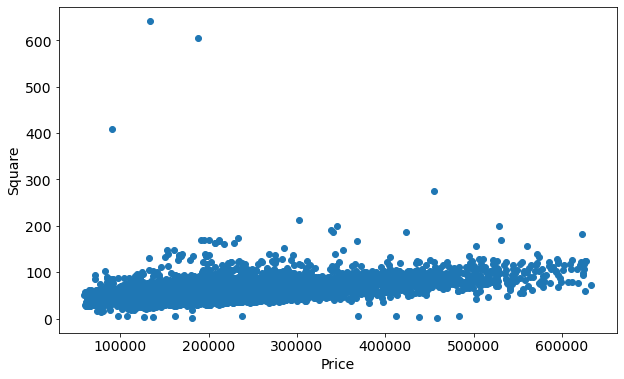

In [74]:
plt.figure(figsize=(10,6))

plt.scatter(tdp['Price'], tdp['Square'])

plt.xlabel('Price')
plt.ylabel('Square')
plt.title['Distribution of Price']
plt.show()

Так, я перебрал все значения и мне стало понятно, что в ряде колонок есть выбросы, в частности как видно выше в колонке Square есть слишком большое значение.

Кроме того, для отслеживания влияния одного признака от кругого, построим корреляционную матрицу.

#### Корреляционная матрица

TypeError: 'function' object is not subscriptable

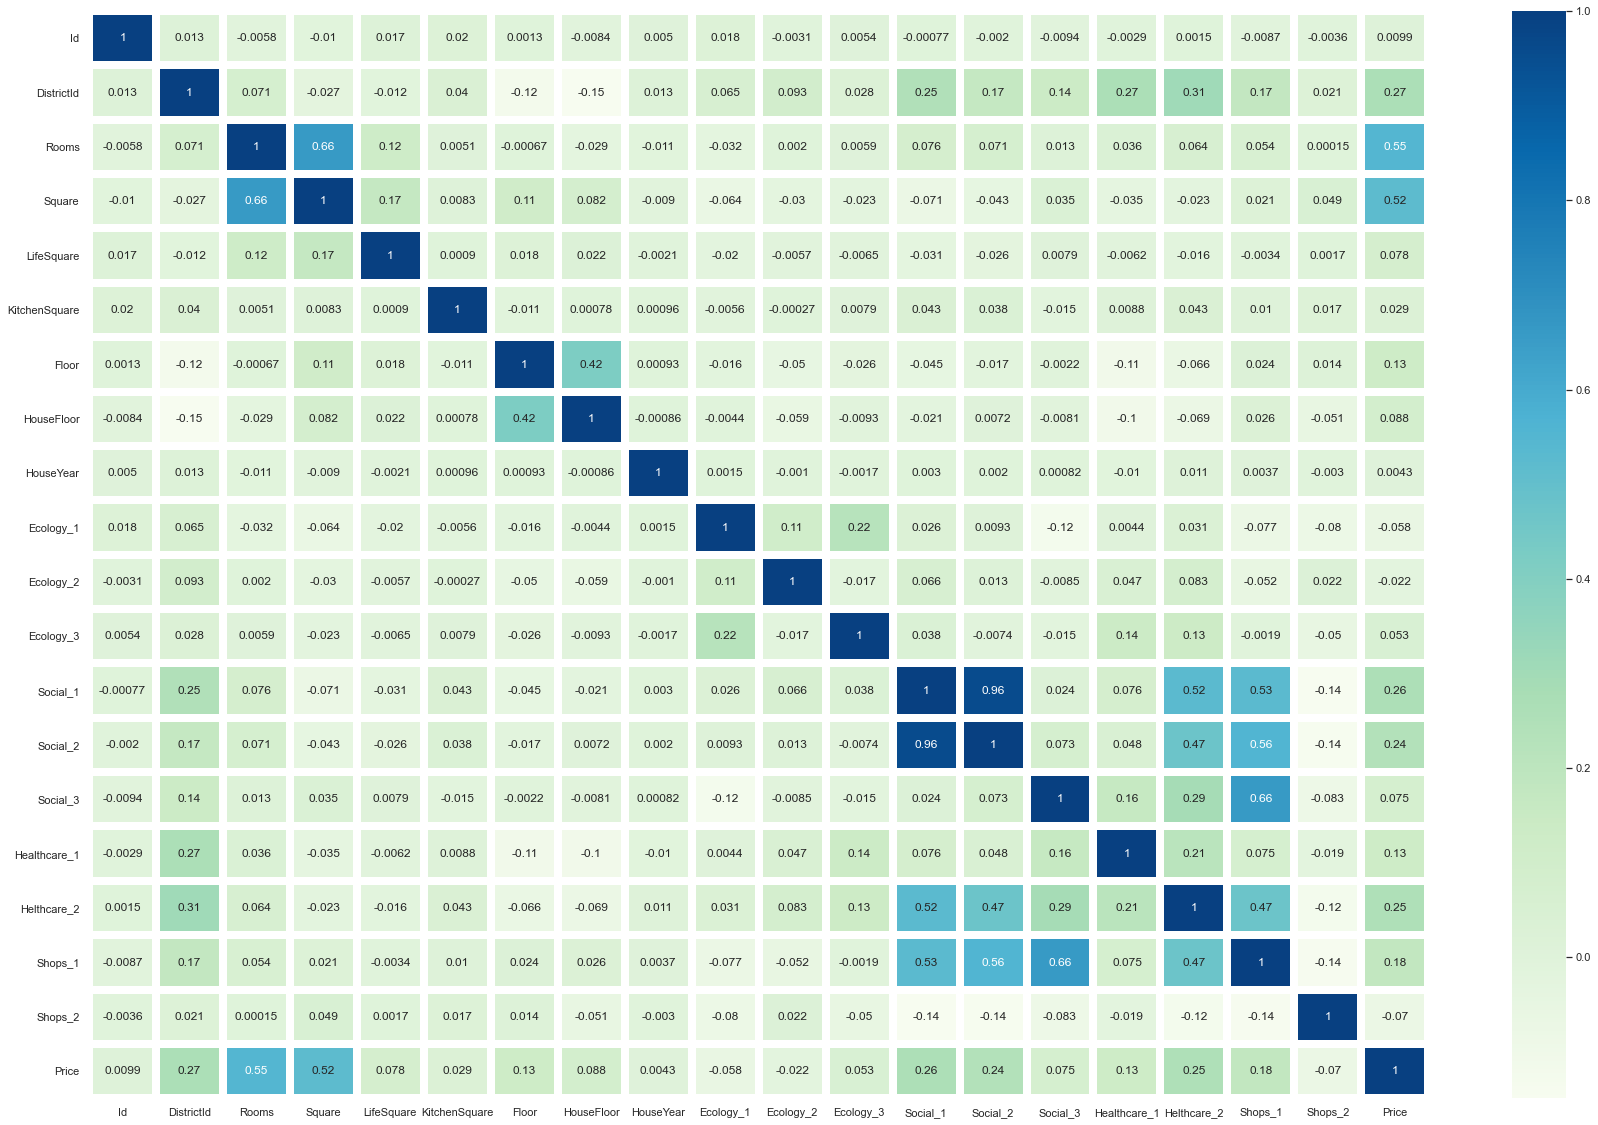

In [75]:
plt.figure(figsize=(30,20))

sns.set(font_scale=1)
sns.heatmap(tdp.corr(),annot=True,linewidth=7,cmap='GnBu')

plt.title['Корреляционная матрица']
plt.show()

В настоящий момент, видно, что цена на недвижимость зависит от количества комнат и квадратуры. Однако так как датасет еще не обработан до конца, данная матрица не очень хорошо показывает какие параметры еще влияют на цену.

Кроме того, проведем анализ целевой переменной. Тоесть колонки Price

### Анализ целевой переменной

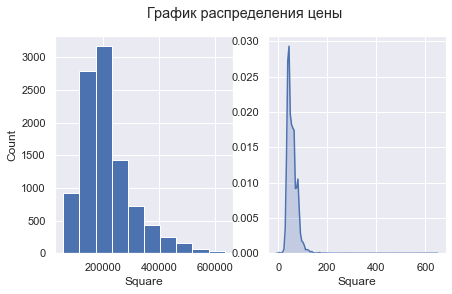

In [76]:
plt.figure(figsize = (7, 4))

plt.subplot(121)
tdp['Price'].hist()
plt.ylabel('Count')
plt.xlabel('Square')

plt.subplot(122)
sns.kdeplot(tdp['Square'], shade=True, legend=False)
plt.xlabel('Square')

plt.suptitle('График распределения цены')
plt.show()

После того, как мы посмотрели все наши переменные, избавимся от выбросов и сделаем наш датасет более точным.

In [77]:
tdp = tdp[tdp['Shops_1'] <= 12.5].reset_index(drop=True)
tdp = tdp[tdp['Shops_1'] > 0].reset_index(drop=True)
tdp = tdp[tdp['Social_3'] <= 20].reset_index(drop=True)
tdp = tdp[tdp['DistrictId'] < 200].reset_index(drop=True)
tdp = tdp[tdp['Rooms'] <= 4].reset_index(drop=True)
tdp = tdp[tdp['Square'] <= 120].reset_index(drop=True)
tdp = tdp[tdp['Square'] >= 20].reset_index(drop=True)
tdp = tdp[tdp['LifeSquare'] <= 90].reset_index(drop=True)
tdp = tdp[tdp['KitchenSquare'] <= 20].reset_index(drop=True)
tdp = tdp[tdp['Floor'] <= 30].reset_index(drop=True)
tdp = tdp[tdp['HouseFloor'] <= 25].reset_index(drop=True)
tdp = tdp[tdp['HouseYear'] <= 2019].reset_index(drop=True)
tdp = tdp[tdp['HouseYear'] > 1955].reset_index(drop=True)
tdp = tdp[tdp['Ecology_1'] <= 0.5].reset_index(drop=True)
tdp = tdp[tdp['Social_1'] <= 55].reset_index(drop=True)
tdp = tdp[tdp['Social_2'] <= 12000].reset_index(drop=True)
tdp = tdp[tdp['Social_3'] <= 20].reset_index(drop=True)
tdp = tdp[tdp['Price'] < 600000].reset_index(drop=True)
tdp = tdp[tdp['Helthcare_2'] <= 5].reset_index(drop=True)
tdp = tdp[tdp['Healthcare_1'] <= 2700].reset_index(drop=True)
tdp = tdp[tdp['Price'] >= 100000].reset_index(drop=True)

Посмотрим снова на наш датасет.

In [169]:
tdp.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000
mean,8385.774389,50.316921,1.891053,54.689809,34.324855,5.875804,8.610876,12.959030,1982.787066,0.124421,0.014698,0.032886,26.739666,5454.231490,3.089473,872.474554,1.264744,3.981812,0.055852,222231.250352
std,4887.681420,42.276088,0.790702,16.358791,13.114837,3.549773,5.089999,5.999202,16.192045,0.126383,0.120351,0.178355,14.378092,2989.521167,3.470181,541.556690,1.297774,2.598136,0.229656,83943.919914
min,2.000000,1.000000,0.000000,20.213128,1.141118,0.000000,1.000000,0.000000,1956.000000,0.000000,0.000000,0.000000,1.000000,264.000000,0.000000,30.000000,0.000000,1.000000,0.000000,100033.410903
25%,4141.000000,11.000000,1.000000,41.562109,24.441283,1.000000,5.000000,9.000000,1972.000000,0.012339,0.000000,0.000000,19.000000,3746.000000,0.000000,730.000000,0.000000,2.000000,0.000000,165304.120760
50%,8403.000000,46.000000,2.000000,51.329889,32.781260,6.000000,8.000000,14.000000,1977.000000,0.075779,0.000000,0.000000,28.000000,5613.000000,3.000000,900.000000,1.000000,4.000000,0.000000,200863.467925
75%,12662.500000,75.000000,2.000000,64.620839,40.938782,8.000000,12.000000,17.000000,1991.000000,0.195781,0.000000,0.000000,37.000000,7651.000000,4.000000,900.000000,2.000000,5.000000,0.000000,254852.542742
max,16798.000000,194.000000,4.000000,117.750933,89.991037,20.000000,27.000000,25.000000,2019.000000,0.486246,1.000000,1.000000,52.000000,11395.000000,20.000000,2672.000000,5.000000,11.000000,1.000000,597921.009105


Сохраним изменения в датасете после его обработки

In [79]:
tdp.to_csv(train_dataset_path,index=False, encoding='utf-8')

А теперь обработаем наш тестовый датасет и сделаем те же операции с ним.

In [80]:
pdp.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [81]:
pdp.loc[pdp['LifeSquare'].isnull(),'LifeSquare'] = pdp['LifeSquare'].median()
pdp.loc[pdp['Healthcare_1'].isnull(),'Healthcare_1'] = pdp['Healthcare_1'].median()

In [82]:
pdp['Ecology_2'].value_counts()

B    4952
A      48
Name: Ecology_2, dtype: int64

In [83]:
pdp['Ecology_3'].value_counts()

B    4851
A     149
Name: Ecology_3, dtype: int64

In [84]:
pdp['Shops_2'].value_counts()

B    4588
A     412
Name: Shops_2, dtype: int64

In [85]:
pdp["Ecology_2"] = np.where(pdp["Ecology_2"]=="A", 1, pdp["Ecology_2"])
pdp["Ecology_2"] = np.where(pdp["Ecology_2"]=="B", 0, pdp["Ecology_2"])

In [86]:
pdp['Ecology_2'] = pdp['Ecology_2'].astype('int64')
pdp['Ecology_2'].dtype

dtype('int64')

In [87]:
pdp["Ecology_3"] = np.where(pdp["Ecology_3"]=="A", 1, pdp["Ecology_3"])
pdp["Ecology_3"] = np.where(pdp["Ecology_3"]=="B", 0, pdp["Ecology_3"])

In [88]:
pdp['Ecology_3'] = pdp['Ecology_3'].astype('int64')
pdp['Ecology_3'].dtype

dtype('int64')

In [89]:
pdp["Shops_2"] = np.where(pdp["Shops_2"]=="A", 1, pdp["Shops_2"])
pdp["Shops_2"] = np.where(pdp["Shops_2"]=="B", 0, pdp["Shops_2"])

In [90]:
pdp['Shops_2'] = pdp['Shops_2'].astype('int64')
pdp['Shops_2'].dtype

dtype('int64')

Сохраним изменения в датасете после его обработки

In [91]:
pdp.to_csv(train_dataset_path,index=False, encoding='utf-8')

А теперь приступим к обучению нашей модели. Разобъем для этого наши колонки на x и y. Целевой параметр выделим отдельно в target name, а остальные признаки попадут в feature_names. 

In [198]:
feature_names = [
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2']

In [199]:
target_name = 'Price'

In [201]:
tdp = tdp[feature_names + [target_name]]

### Разбиение на train и test

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
x = tdp[feature_names]

In [189]:
y = tdp[target_name]

In [190]:
x_train, x_test = train_test_split(x, train_size=0.7, random_state=42)
y_train, y_test = train_test_split(y, train_size=0.7, random_state=42)

Для предсказания цены на недвижимость я использовал метод Линейной регрессии.

Импортируем для этого из библиотеки скайлерн модель линейной регрессии.

In [98]:
from sklearn.linear_model import LinearRegression

Кроме того, для того чтобы оценить точность предсказания, импортируем такие показатели как коэффициент детерминации, среднее значение, САБ, СКО. 

In [99]:
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from math import sqrt

а теперь создадим функцию, которая будет наглядно показывать необходимые нам параметры

In [100]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(sqrt(mse(true_values, pred_values)), 3)))
          
    plt.figure(figsize=(10,10))
          
    sns.scatterplot(x=pred_values, y=true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title['True vs Predicted values']
    plt.show()

### Линейная регрессия

In [173]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [204]:
y_train_preds = lr_model.predict(x_train)

R2:	0.642
MAE:	35820.065
MSE:	2588528490.279
RMSE:	50877.583


TypeError: 'function' object is not subscriptable

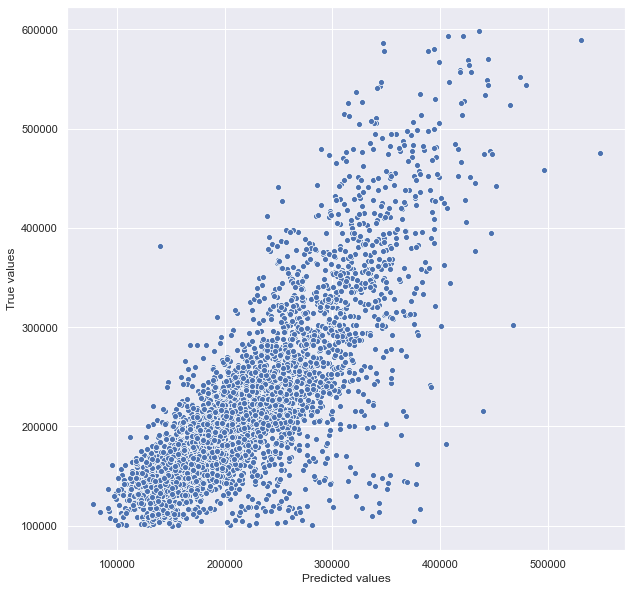

In [205]:
evaluate_preds(y_train, y_train_preds)

In [176]:
lr_model = LinearRegression()
lr_model.fit(x_test, y_test)

LinearRegression()

После того, как мы обучили нашу модель. Предскажем цену на недвижимость для нашего тестового датасета.

R2:	0.656
MAE:	34644.265
MSE:	2278970807.125
RMSE:	47738.567


TypeError: 'function' object is not subscriptable

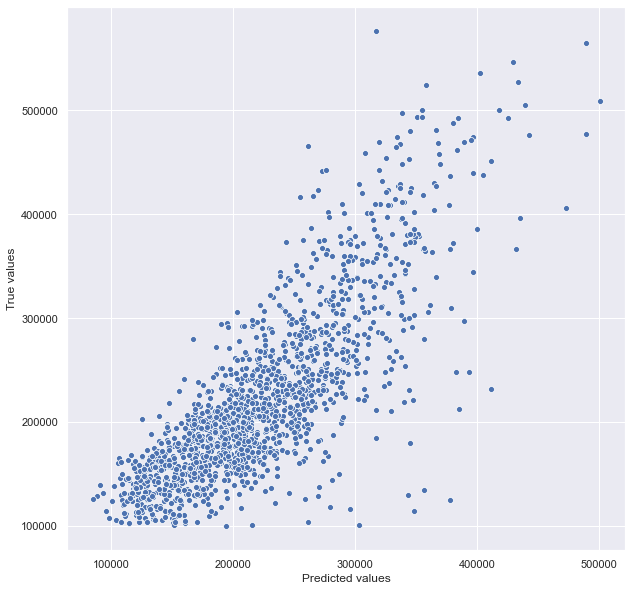

In [206]:
y_test_preds = lr_model.predict(x_test)
evaluate_preds(y_test, y_test_preds)

Таким образом, точность предсказания составила 0.65

In [220]:
price_predictions = pd.DataFrame({'Price':y_test_preds},
                         columns=['Price'])

In [221]:
dataset_price = 'VALavrov_predictions.csv '

In [222]:
price_predictions.to_csv(dataset_price,index=False, encoding='utf-8')